In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [104]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [8]:
bike_sharing_data = pd.read_csv('day.csv')
bike_sharing_data.shape # what does our data look like?

(731, 16)

In [9]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
# working day: 0=N, 1=Y
# temp has been standardized from 0-1
# count (cnt) is number of bikes rented that day

In [12]:
## Question - Does the temperature and workingday impact the number of bikes rented?

In [14]:
# extract subset of data and save as separate csv
bike_sharing_data = bike_sharing_data[['season',
                                       'mnth',
                                       'holiday',
                                       'workingday',
                                       'weathersit',
                                       'temp',
                                       'cnt']]

In [15]:
bike_sharing_data.to_csv('bike_sharing_data_processed.csv', index=False)

In [16]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [18]:
# season: 1= Spring, 2= Summer, 3= Fall, 4= Winter
# holiday: 0=N, 1=Y
# weathersit: 1= Clear 2= Cloudy 3= Snow, rain, thunderstorm

In [21]:
# Is there a difference between the number of bikes rented on a workingday v. non-working day?
bike_sharing_data.groupby('workingday')['cnt'].describe() 

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


<Axes: title={'center': 'cnt'}, xlabel='workingday'>

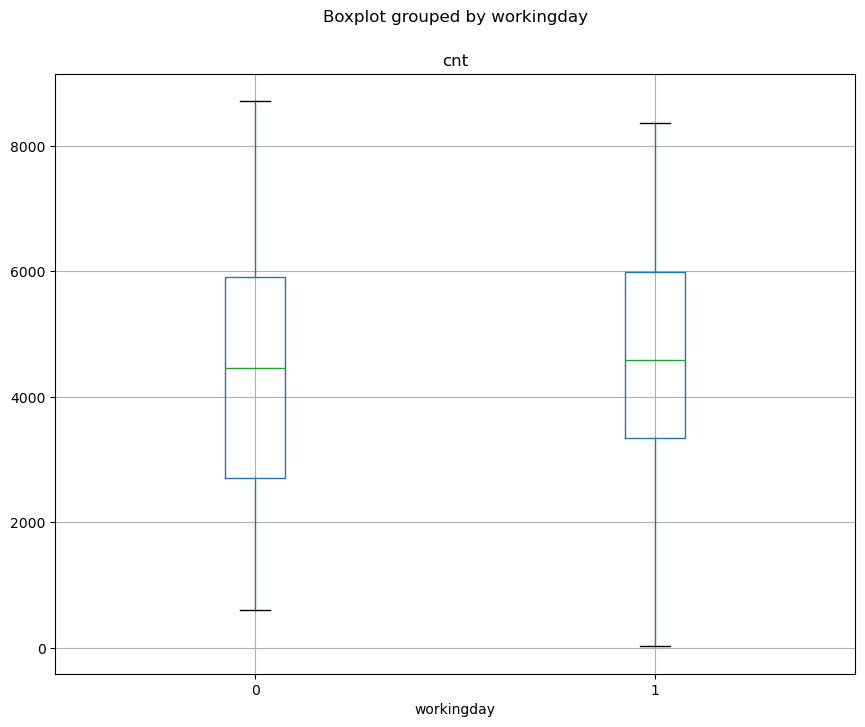

In [22]:
bike_sharing_data.boxplot(column=['cnt'], by='workingday', figsize=(10,8))

In [23]:
# split data into 2 samples to perform t-test

In [24]:
sample_01 = bike_sharing_data[(bike_sharing_data['workingday'] == 1)]
sample_02 = bike_sharing_data[(bike_sharing_data['workingday'] == 0)]

In [25]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [26]:
# making sample sizes the same

In [27]:
sample_01 = sample_01.sample(231)
sample_01.shape, sample_02.shape

((231, 7), (231, 7))

In [30]:
# test the variance of the two groups via the Levene's test
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=5.268184478060429, pvalue=0.022167876154771022)

In [31]:
# pvalue is <5% meaning alternate hypothesis should be ACCEPTED

(array([ 3.,  9., 15., 33., 35., 47., 34., 27., 16., 12.]),
 array([-2.62302032, -2.14068424, -1.65834815, -1.17601206, -0.69367598,
        -0.21133989,  0.2709962 ,  0.75333229,  1.23566837,  1.71800446,
         2.20034055]),
 <BarContainer object of 10 artists>)

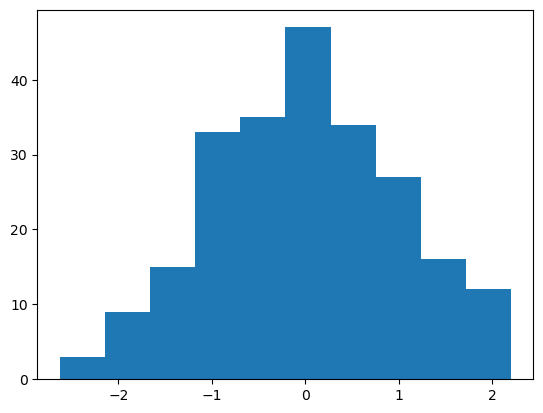

In [37]:
# Does the distribution of the residuals between the two groups follow a normal distribution? Yes

diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt'], dtype=float))
plt.hist(diff)

In [38]:
stats.shapiro(diff)

ShapiroResult(statistic=0.9937431216239929, pvalue=0.4474400281906128)

In [44]:
## perform independent t-test on workingday

In [40]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

TtestResult(statistic=2.04383572551541, pvalue=0.04153880792392125, df=460.0)

In [43]:
# because the pvalue is <5% we can reject the null hypothesis and accept the alternate hypothesis, 
# meaning that workingday DOES impact the number of bikes rented

In [45]:
# Does temperature have an impact on the number of bikes rented?

<Axes: >

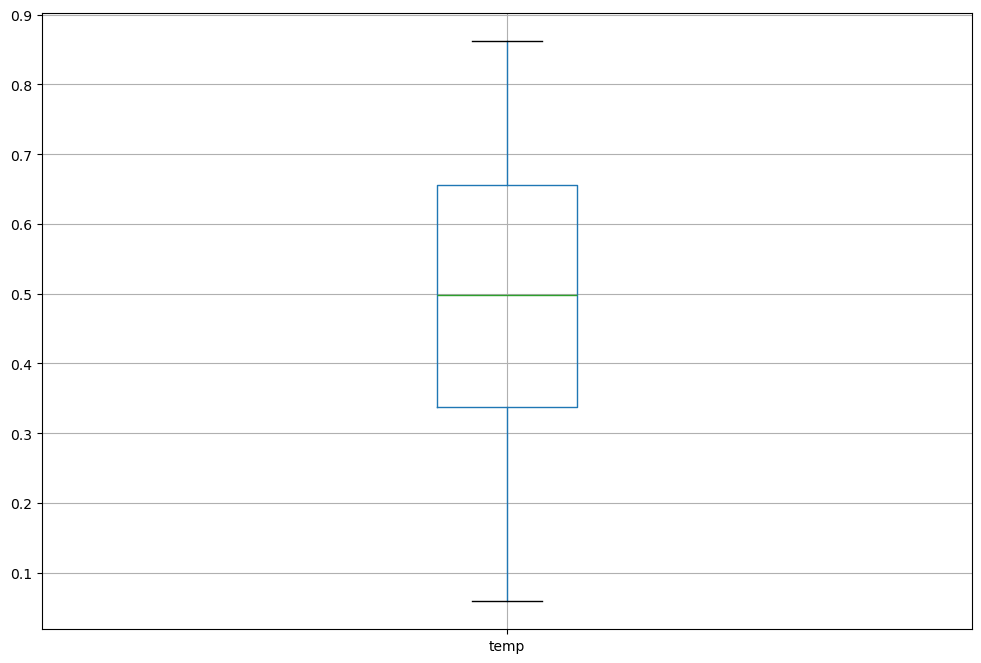

In [46]:
bike_sharing_data[['temp']].boxplot(figsize=(12,8))

In [47]:
# split data into 2 samples to perform Welch's t-test

In [120]:
# create new column with True/False values if above or below average temp
bike_sharing_data['temp_category'] =  \
    bike_sharing_data['temp'] > bike_sharing_data['temp'].mean()

In [50]:
bike_sharing_data.sample(10)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
144,2,5,0,1,1,0.660833,4978,True
287,4,10,0,0,1,0.506667,5217,True
667,4,10,0,1,3,0.440000,22,False
195,3,7,0,1,1,0.663333,5538,True
455,2,3,0,0,2,0.424167,6235,False
34,1,2,0,1,2,0.211304,1708,False
599,3,8,0,1,1,0.667500,7375,True
685,4,11,0,1,1,0.345000,5698,False
504,2,5,0,0,1,0.600000,8294,True
426,1,3,0,1,2,0.353333,3194,False


In [51]:
bike_sharing_data.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


<Axes: title={'center': 'cnt'}, xlabel='temp_category'>

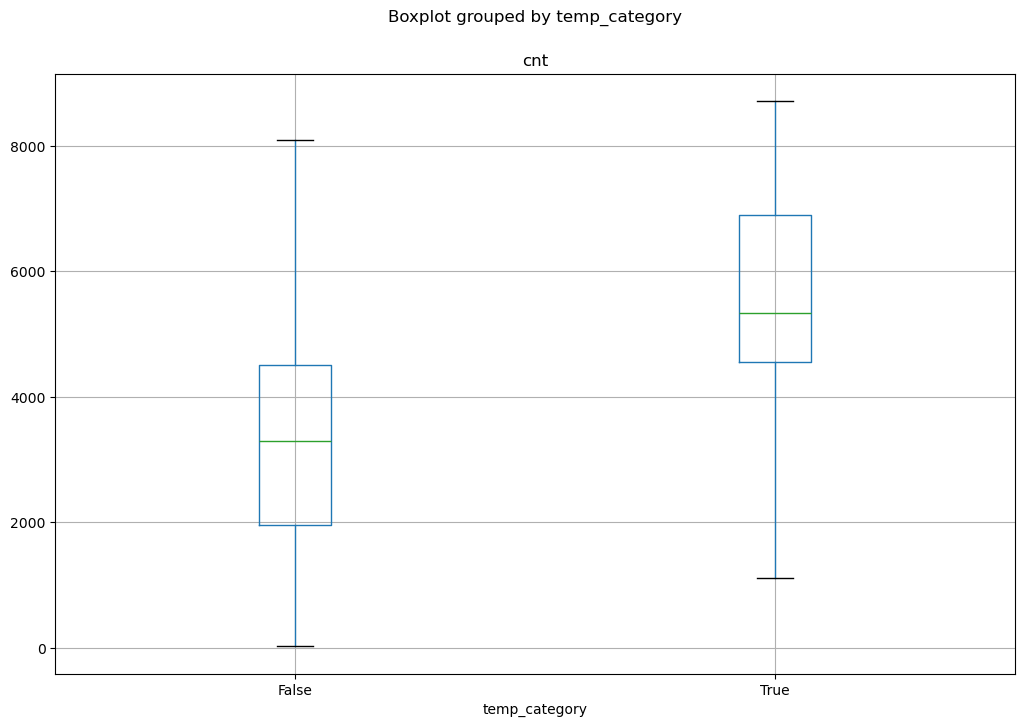

In [59]:
bike_sharing_data.boxplot(column=['cnt'], by='temp_category', figsize=(12, 8))

In [60]:
sample_01 = bike_sharing_data[(bike_sharing_data['temp_category'] == True)]
sample_02 = bike_sharing_data[(bike_sharing_data['temp_category'] == False)]

In [61]:
sample_01.shape, sample_02.shape

((367, 8), (364, 8))

In [63]:
# make the sample size the same
sample_01 = sample_01.sample(364)
sample_01.shape, sample_02.shape

((364, 8), (364, 8))

In [64]:
# test the variance of the two groups via the Levene's test
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=4.971925630800578, pvalue=0.02606700527270777)

In [65]:
# pvalue is <5% meaning alternate hypothesis should be ACCEPTED

(array([10., 19., 32., 60., 50., 72., 63., 38., 13.,  7.]),
 array([-2.48784982, -1.99098315, -1.49411647, -0.9972498 , -0.50038313,
        -0.00351645,  0.49335022,  0.99021689,  1.48708357,  1.98395024,
         2.48081691]),
 <BarContainer object of 10 artists>)

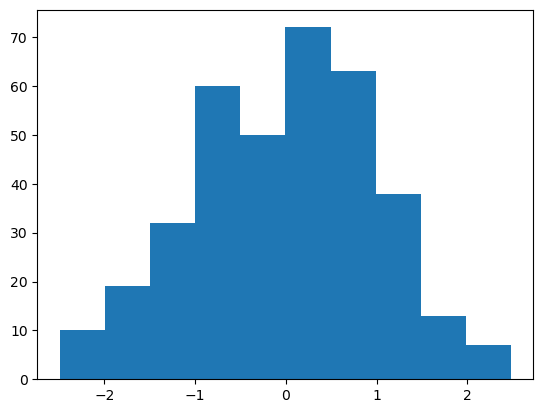

In [66]:
# Does the distribution of the residuals between the two groups follow a normal distribution? Yes

diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt'], dtype=float))
plt.hist(diff)

In [67]:
stats.shapiro(diff)

ShapiroResult(statistic=0.9931755661964417, pvalue=0.09780365973711014)

In [68]:
# according to the shapiro test, the data is NOT normally distributed

In [105]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

TtestResult(statistic=18.927391028327754, pvalue=3.0141660019063066e-65, df=726.0)

In [119]:
# the t-test shows that the pvalue <5% meaning that we should ACCEPT the alternate hypothesis 
# however the variances are not equal
# perform Welch's t-test

In [117]:
print(stats.ttest_ind(sample_01['cnt'], sample_02['cnt'], equal_var = False)) 

TtestResult(statistic=18.927391028327754, pvalue=4.944710496441499e-65, df=712.285912943202)


In [118]:
# conclusion - weather DOES have a significant impact on the number of bikes rented